#### Libraries and loading

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

plt.style.use("seaborn-whitegrid")
sns.set(style="whitegrid", color_codes=True)


rcParams["axes.labelsize"] = 14
rcParams["xtick.labelsize"] = 12
rcParams["ytick.labelsize"] = 12
rcParams["figure.figsize"] = 16, 8

warnings.filterwarnings("ignore")

In [2]:
pain = pd.read_csv("data/pain.csv").drop(columns="Unnamed: 6")
pain.columns = pain.columns.str.replace(" ", "")
pain["date"] = pd.to_datetime(pain["date"], dayfirst=True)  # .dt.strftime('%d/%m/%Y')
pain = pain.set_index("date")

In [3]:
sports = pd.read_csv("data/sport.csv")
sports.columns = sports.columns.str.replace(" ", "")
sports["date"] = pd.to_datetime(sports["date"], dayfirst=True)
sports["sport"] = sports["sport"].str.strip()
sports = sports.set_index("date")

In [4]:
pain.shape

(169, 5)

# Data Engineering

## Crossfit

In [5]:
cf = sports.reset_index().groupby(["date", "sport"]).sum().reset_index()
cf = cf[cf.sport == "CF"]

In [6]:
cf.columns = ["date", "sport", "total_intensity_CF", "knee_intensity_CF", "time"]

In [7]:
df = pain.join(cf.set_index("date").knee_intensity_CF)

In [8]:
df.fillna(0, inplace=True)

In [9]:
df["knee_intensity_CF_lag_1"] = df.knee_intensity_CF.shift(1)
df["knee_intensity_CF_lag_2"] = df.knee_intensity_CF.shift(2)
df["knee_intensity_CF_lag_3"] = df.knee_intensity_CF.shift(3)

In [10]:
df.fillna(0, inplace=True)

## Kite

In [11]:
kite = sports.reset_index().groupby(["date", "sport"]).sum().reset_index()
kite = kite[kite.sport == "Kite"]

In [12]:
kite.columns = ["date", "sport", "total_intensity_kite", "knee_intensity_kite", "time"]

In [13]:
df = df.join(kite.set_index("date").knee_intensity_kite)

In [14]:
df.fillna(0, inplace=True)

In [15]:
df["knee_intensity_kite_lag_1"] = df.knee_intensity_kite.shift(1)
df["knee_intensity_kite_lag_2"] = df.knee_intensity_kite.shift(2)
df["knee_intensity_kite_lag_3"] = df.knee_intensity_kite.shift(3)

In [16]:
df.fillna(0, inplace=True)

In [17]:
df

,pain,leg_fatigue,total_fatigue,nsaids,colageno,knee_intensity_CF,knee_intensity_CF_lag_1,knee_intensity_CF_lag_2,knee_intensity_CF_lag_3,knee_intensity_kite,knee_intensity_kite_lag_1,knee_intensity_kite_lag_2,knee_intensity_kite_lag_3
date,,,,,,,,,,,,,
2021-03-27,4.0,2,2,False,False,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-03-28,7.0,10,10,False,False,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-03-29,6.0,8,8,False,False,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
2021-03-30,5.0,6,6,False,False,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
2021-03-31,3.0,3,4,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-07,1.0,0,2,False,False,4.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
2021-09-08,0.0,0,2,False,False,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-09-09,1.0,0,1,False,False,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0


## Others

In [18]:
aux = sports.reset_index().groupby(["date", "sport"]).sum().reset_index()
aux = aux[(aux.sport != "CF") & (aux.sport != "Kite")]

In [19]:
aux.columns = ["date", "sport", "total_intensity_other", "knee_intensity_other", "time"]

In [20]:
df = df.join(aux.set_index("date").knee_intensity_other)

In [21]:
df.fillna(0, inplace=True)

In [22]:
df["knee_intensity_other_lag_1"] = df.knee_intensity_other.shift(1)
df["knee_intensity_other_lag_2"] = df.knee_intensity_other.shift(2)
df["knee_intensity_other_lag_3"] = df.knee_intensity_other.shift(3)

In [23]:
df.fillna(0, inplace=True)

# Modeling

## Predict the same day

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

import shap
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor

In [25]:
df = df.reset_index(drop=True)

In [26]:
df.nsaids = df.nsaids.astype(bool)

In [27]:
df.colageno = df.colageno.astype(bool)

In [28]:
X_tr, X_te, y_tr, y_te = train_test_split(
    df.drop(columns="pain"), df[["pain"]], test_size=0.2, random_state=42
)

### Dummy

In [29]:
mean_absolute_error(np.zeros_like(y_tr) + np.mean(y_tr).values, y_tr)

0.9975999999999999

In [30]:
mean_absolute_error(np.zeros_like(y_te) + np.mean(y_te).values, y_te)

0.7271468144044321

### Lasso

In [31]:
clf = Lasso(alpha=0.1)

In [32]:
clf.fit(X_tr, y_tr)

Lasso(alpha=0.1)

In [33]:
mean_absolute_error(clf.predict(X_tr), y_tr)

0.9211861388177108

In [34]:
mean_absolute_error(clf.predict(X_te), y_te)

0.7773145321425133

In [35]:
print("Model coefficients:\n")
for i in range(X_tr.shape[1]):
    print(X_tr.columns[i], "=", clf.coef_[i].round(4))

Model coefficients:

leg_fatigue = 0.1189
total_fatigue = 0.0554
nsaids = 0.0
colageno = 0.0
knee_intensity_CF = 0.0505
knee_intensity_CF_lag_1 = 0.004
knee_intensity_CF_lag_2 = 0.0213
knee_intensity_CF_lag_3 = 0.0119
knee_intensity_kite = 0.0274
knee_intensity_kite_lag_1 = 0.0
knee_intensity_kite_lag_2 = 0.0
knee_intensity_kite_lag_3 = -0.0184
knee_intensity_other = 0.0468
knee_intensity_other_lag_1 = 0.0
knee_intensity_other_lag_2 = 0.0
knee_intensity_other_lag_3 = 0.0194


### Decision tree

In [36]:
dt = DecisionTreeRegressor(max_depth=3, criterion="mae")
dt.fit(X_tr, y_tr)

DecisionTreeRegressor(criterion='mae', max_depth=3)

In [37]:
print("Decision Tree Results")

Decision Tree Results


In [38]:
print("Train ", mean_absolute_error(dt.predict(X_tr), y_tr))

Train  0.7133333333333334


In [39]:
print("Test ", mean_absolute_error(dt.predict(X_te), y_te))

Test  0.7631578947368421


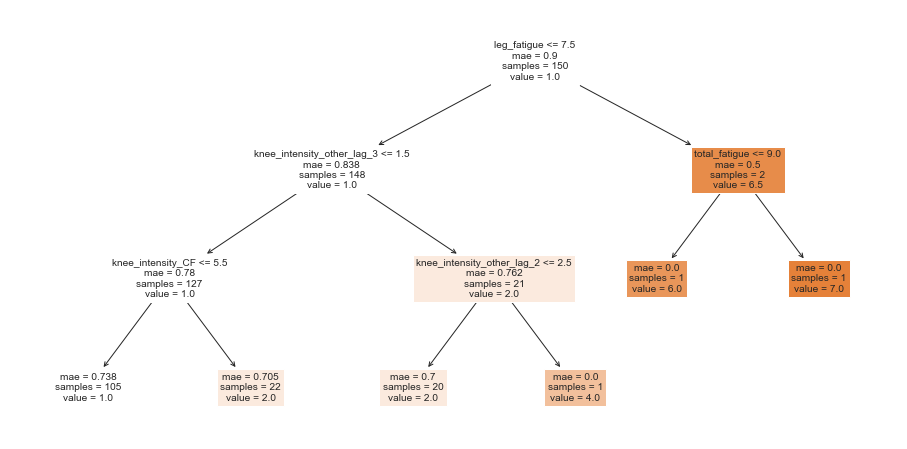

In [40]:
plt.figure()
plot_tree(dt, feature_names=X_te.columns, filled=True)
plt.savefig("images/dt.svg", format="svg")

### Random Forest

In [41]:
rf = RandomForestRegressor(min_samples_leaf=3)
rf.fit(X_tr, y_tr)

RandomForestRegressor(min_samples_leaf=3)

In [42]:
print("RF results")

RF results


In [43]:
print("Train", mean_absolute_error(rf.predict(X_tr), y_tr))

Train 0.5740486155511155


In [44]:
print("Test", mean_absolute_error(rf.predict(X_te), y_te))

Test 0.8156005547814758


### Xgboost

In [45]:
xgb = XGBRFRegressor().fit(X_tr, y_tr)
print("XGB Results")
print("Train ", mean_absolute_error(xgb.predict(X_tr), y_tr))

XGB Results
Train  0.5368832663695018


In [46]:
print("Test ", mean_absolute_error(xgb.predict(X_te), y_te))

Test  0.7862265439409959


## Predict Next Day

In [47]:
df["pain_shift"] = df.pain - df.pain.shift()
df = df.dropna().drop(columns="pain")
X_tr, X_te, y_tr, y_te = train_test_split(
    df.drop(columns="pain_shift"), df[["pain_shift"]], test_size=0.2, random_state=42
)

### Dummy

In [48]:
mean_absolute_error(np.zeros_like(y_tr) + np.mean(y_tr).values, y_tr)

0.7421737759560381

In [49]:
mean_absolute_error(np.zeros_like(y_te) + np.mean(y_te).values, y_te)

0.5789473684210527

### Lasso

In [50]:
clf = Lasso(alpha=0.1)

In [51]:
clf.fit(X_tr, y_tr)

Lasso(alpha=0.1)

In [52]:
mean_absolute_error(clf.predict(X_tr), y_tr)

0.7570606109675946

In [53]:
mean_absolute_error(clf.predict(X_te), y_te)

0.6586512748065464

In [54]:
print("Model coefficients:\n")
for i in range(X_tr.shape[1]):
    print(X_tr.columns[i], "=", clf.coef_[i].round(4))

Model coefficients:

leg_fatigue = 0.0
total_fatigue = -0.0029
nsaids = 0.0
colageno = 0.0
knee_intensity_CF = 0.098
knee_intensity_CF_lag_1 = -0.0
knee_intensity_CF_lag_2 = 0.0219
knee_intensity_CF_lag_3 = 0.0
knee_intensity_kite = 0.0073
knee_intensity_kite_lag_1 = -0.0139
knee_intensity_kite_lag_2 = -0.0
knee_intensity_kite_lag_3 = -0.0013
knee_intensity_other = 0.0003
knee_intensity_other_lag_1 = -0.0
knee_intensity_other_lag_2 = -0.0
knee_intensity_other_lag_3 = 0.0


### Decision tree

In [55]:
dt = DecisionTreeRegressor(max_depth=3, min_samples_leaf=2, criterion="mae")
dt.fit(X_tr, y_tr)

DecisionTreeRegressor(criterion='mae', max_depth=3, min_samples_leaf=2)

In [56]:
print("Decision Tree Results")

Decision Tree Results


In [57]:
print("Train ", mean_absolute_error(dt.predict(X_tr), y_tr))

Train  0.6174496644295302


In [58]:
print("Test ", mean_absolute_error(dt.predict(X_te), y_te))

Test  0.5526315789473685


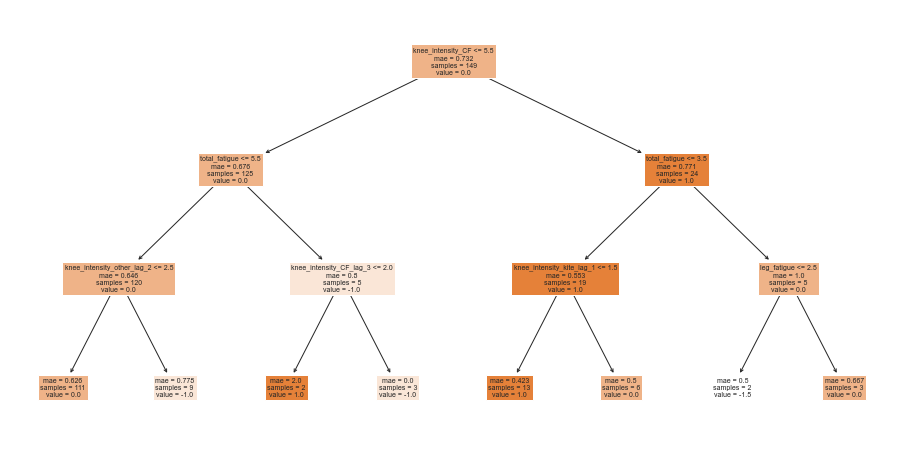

In [59]:
plt.figure()
plot_tree(dt, feature_names=X_te.columns, filled=True)
plt.savefig("images/dt_shift.svg", format="svg")

### Random Forest

In [60]:
rf = RandomForestRegressor(min_samples_leaf=3)
rf.fit(X_tr, y_tr)

RandomForestRegressor(min_samples_leaf=3)

In [61]:
print("RF results")

RF results


In [62]:
print("Train", mean_absolute_error(rf.predict(X_tr), y_tr))

Train 0.5027510618576054


In [63]:
print("Test", mean_absolute_error(rf.predict(X_te), y_te))

Test 0.6882702564248616


### Xgboost

In [64]:
xgb = XGBRFRegressor().fit(X_tr, y_tr)
print("XGB Results")
print("Train ", mean_absolute_error(xgb.predict(X_tr), y_tr))

XGB Results
Train  0.48801766543792896


In [65]:
print("Test ", mean_absolute_error(xgb.predict(X_te), y_te))

Test  0.7011340710849158


In [66]:
explainer = shap.Explainer(xgb)
shap_values = explainer(X_tr)

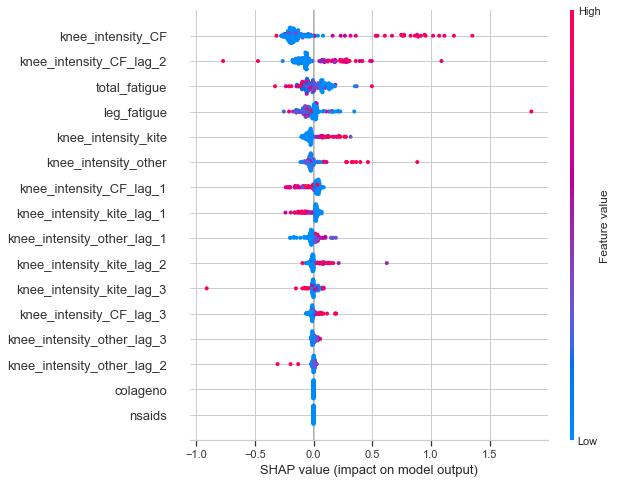

In [67]:
shap.summary_plot(shap_values, X_tr, show=False)
plt.savefig("images/summary_shap.png")

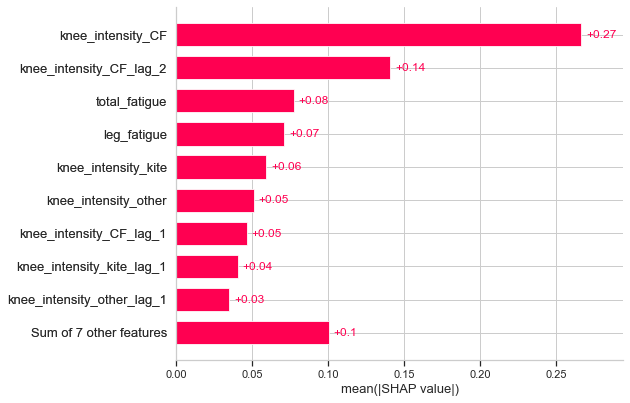

In [68]:
shap.plots.bar(shap_values, show=False)
plt.savefig("images/global_shap.png")